In [1]:
#under this notebook we will understand how tousrim FEE has increase form 1991 to 2022

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
df = pd.read_excel("Data from 2019-2022 excel files (copy)/Tourism-Statistics-for-year-2022.xlsx" ,sheet_name = "Table 13", skiprows = 1)

In [52]:
#This will drop the value unwanted rows 
df = df.drop(["% Change over previous year","US $ Million","% Change over previous\nyear"], axis = 1)

In [53]:
#renaming the column 

df.columns = ["Year","FEE"]

In [54]:
#droping the final NaN

df = df.dropna()

In [55]:
#fixing the year from 2020 to 2022

for i in range(11, 14):
    current_year = str(df.iloc[i]['Year'])
    if '#' in current_year:
        clean_year = int(current_year.split('#')[0])
        df.iloc[i, df.columns.get_loc('Year')] = clean_year

In [56]:
#converting the values of FEE into Thousands

df.loc[:, "FEE"] = df["FEE"] / 100 #this is used to declare that its done on the origianl file and on all the locations 

In [58]:
#data extraction before plotting 

year = df["Year"]
FEE = df["FEE"]

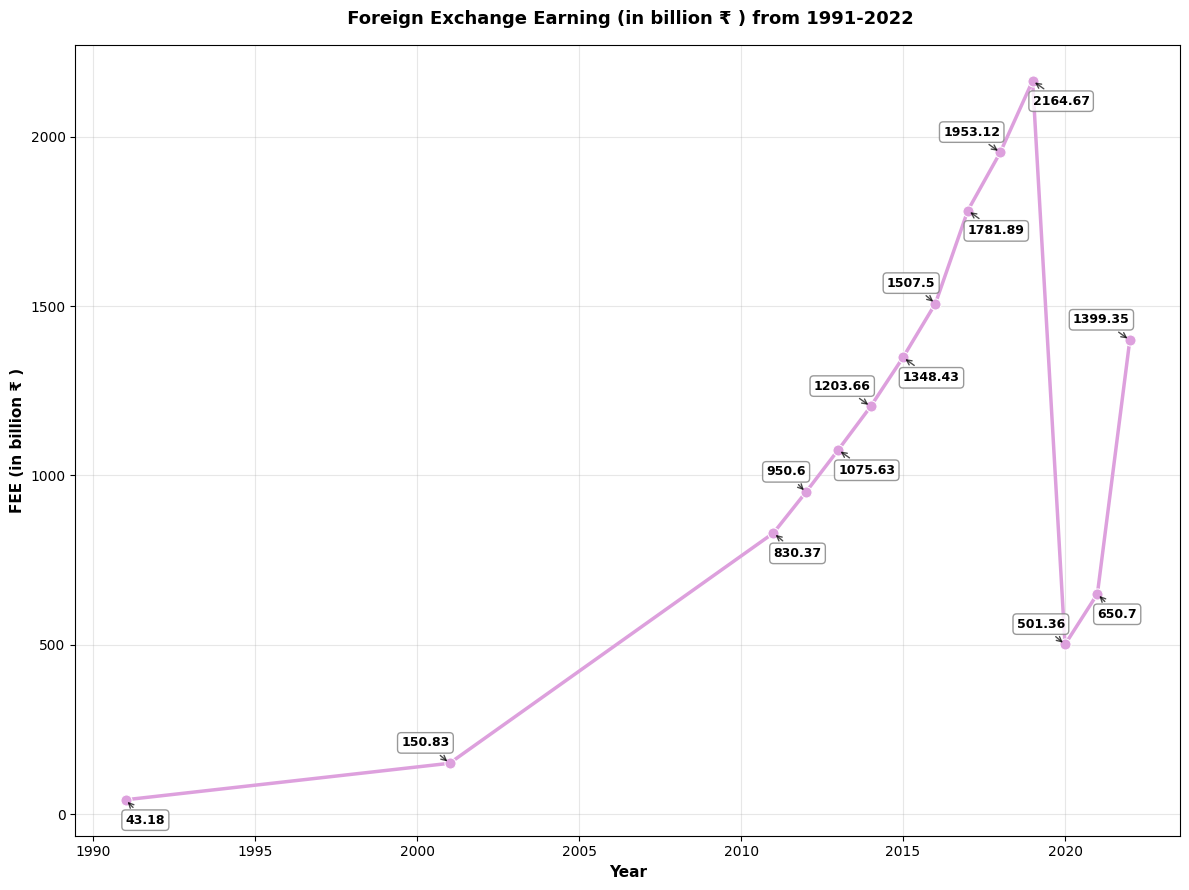

In [65]:
#plotting the line chart 
plt.figure(figsize = (12,9))

sns.lineplot(x="Year",y="FEE", data = df ,marker='o', markersize=8, linewidth=2.5, color="#DDA0DD")
plt.title(" Foreign Exchange Earning (in billion ₹ ) from 1991-2022", fontsize = 13, fontweight = "bold", pad=15)
plt.xlabel('Year', fontsize=11, fontweight='bold')
plt.ylabel('FEE (in billion ₹ )', fontsize=11, fontweight='bold')

#annotation for 1 
for i in range(len(df)):
    # Alternate annotation positions to avoid overlap
    if i % 2 == 0:
        xytext_offset = (0, -10)  # Below the point
        va_align = 'top'
        ha_align = "left"
    else:
        xytext_offset = (0, 10)  # Above the point
        va_align = 'bottom'
        ha_align = "right"
        
    plt.annotate(f'{FEE[i]}', 
                xy=(year[i], FEE[i]),
                xytext=xytext_offset,
                textcoords='offset points',
                ha= ha_align,
                va=va_align,
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', 
                         edgecolor='grey',
                         alpha=0.8),
                arrowprops=dict(arrowstyle='->', 
                               color='black', 
                               lw=1,
                               alpha=0.7))

#customization needs 
plt.grid(True, alpha=0.3)
plt.tight_layout()

#saving the image
plt.savefig('Tourism_FEE_increase_overtime.png', 
            dpi=300,                    # High resolution
            bbox_inches='tight',        # Remove extra whitespace
            facecolor='white',          # White background
            edgecolor='none',           # No border
            pad_inches=0.1)             # Small padding

In [57]:
df

,Year,FEE
0,1991,43.18
1,2001,150.83
2,2011,830.37
3,2012,950.60
4,2013,1075.63
5,2014,1203.66
6,2015,1348.43
7,2016,1507.50
8,2017,1781.89
9,2018,1953.12
